# <span style='color:OrangeRed'>V9 - Zustandsrekonstruktion mittels Beobachter</span>

## <span style='color:Gray'>Beispiel #1 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Für das System:

In [ ]:
pkg load control

In [ ]:
A = [-2 1;
      0 -1];
  
B = [1; 1];

C = [1 0];

D = 0;

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
soll ein Beobachter entworfen werden mit den Polen: $s_{1,2}$ = [-10+1j*5 -10-1j*5]

In [ ]:
poles = [-10+1j*5 -10-1j*5]
% po = [-5+1j*5 -5-1j*5]  % Beobachterpole

In [ ]:
So = [C; C*A]
rank(So)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Zunächst prüfen wir die Beobachtbarkeit und die Beobachterverstärkung wird berechnet zu:

In [ ]:
G = place(A',C',poles)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
    Durch die Matrix <code>G</code> ändert sich das dynamische Verhalten des geschlossenen Systems
mit Beobachter.
<br> bestimmen wir die Eigenwerte für das System mit Beobachter:

In [ ]:
Ao = A-G'*C
eigs(Ao)

In [ ]:
Bo = [B G']

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
 Veranschaulichung durch Simulink:

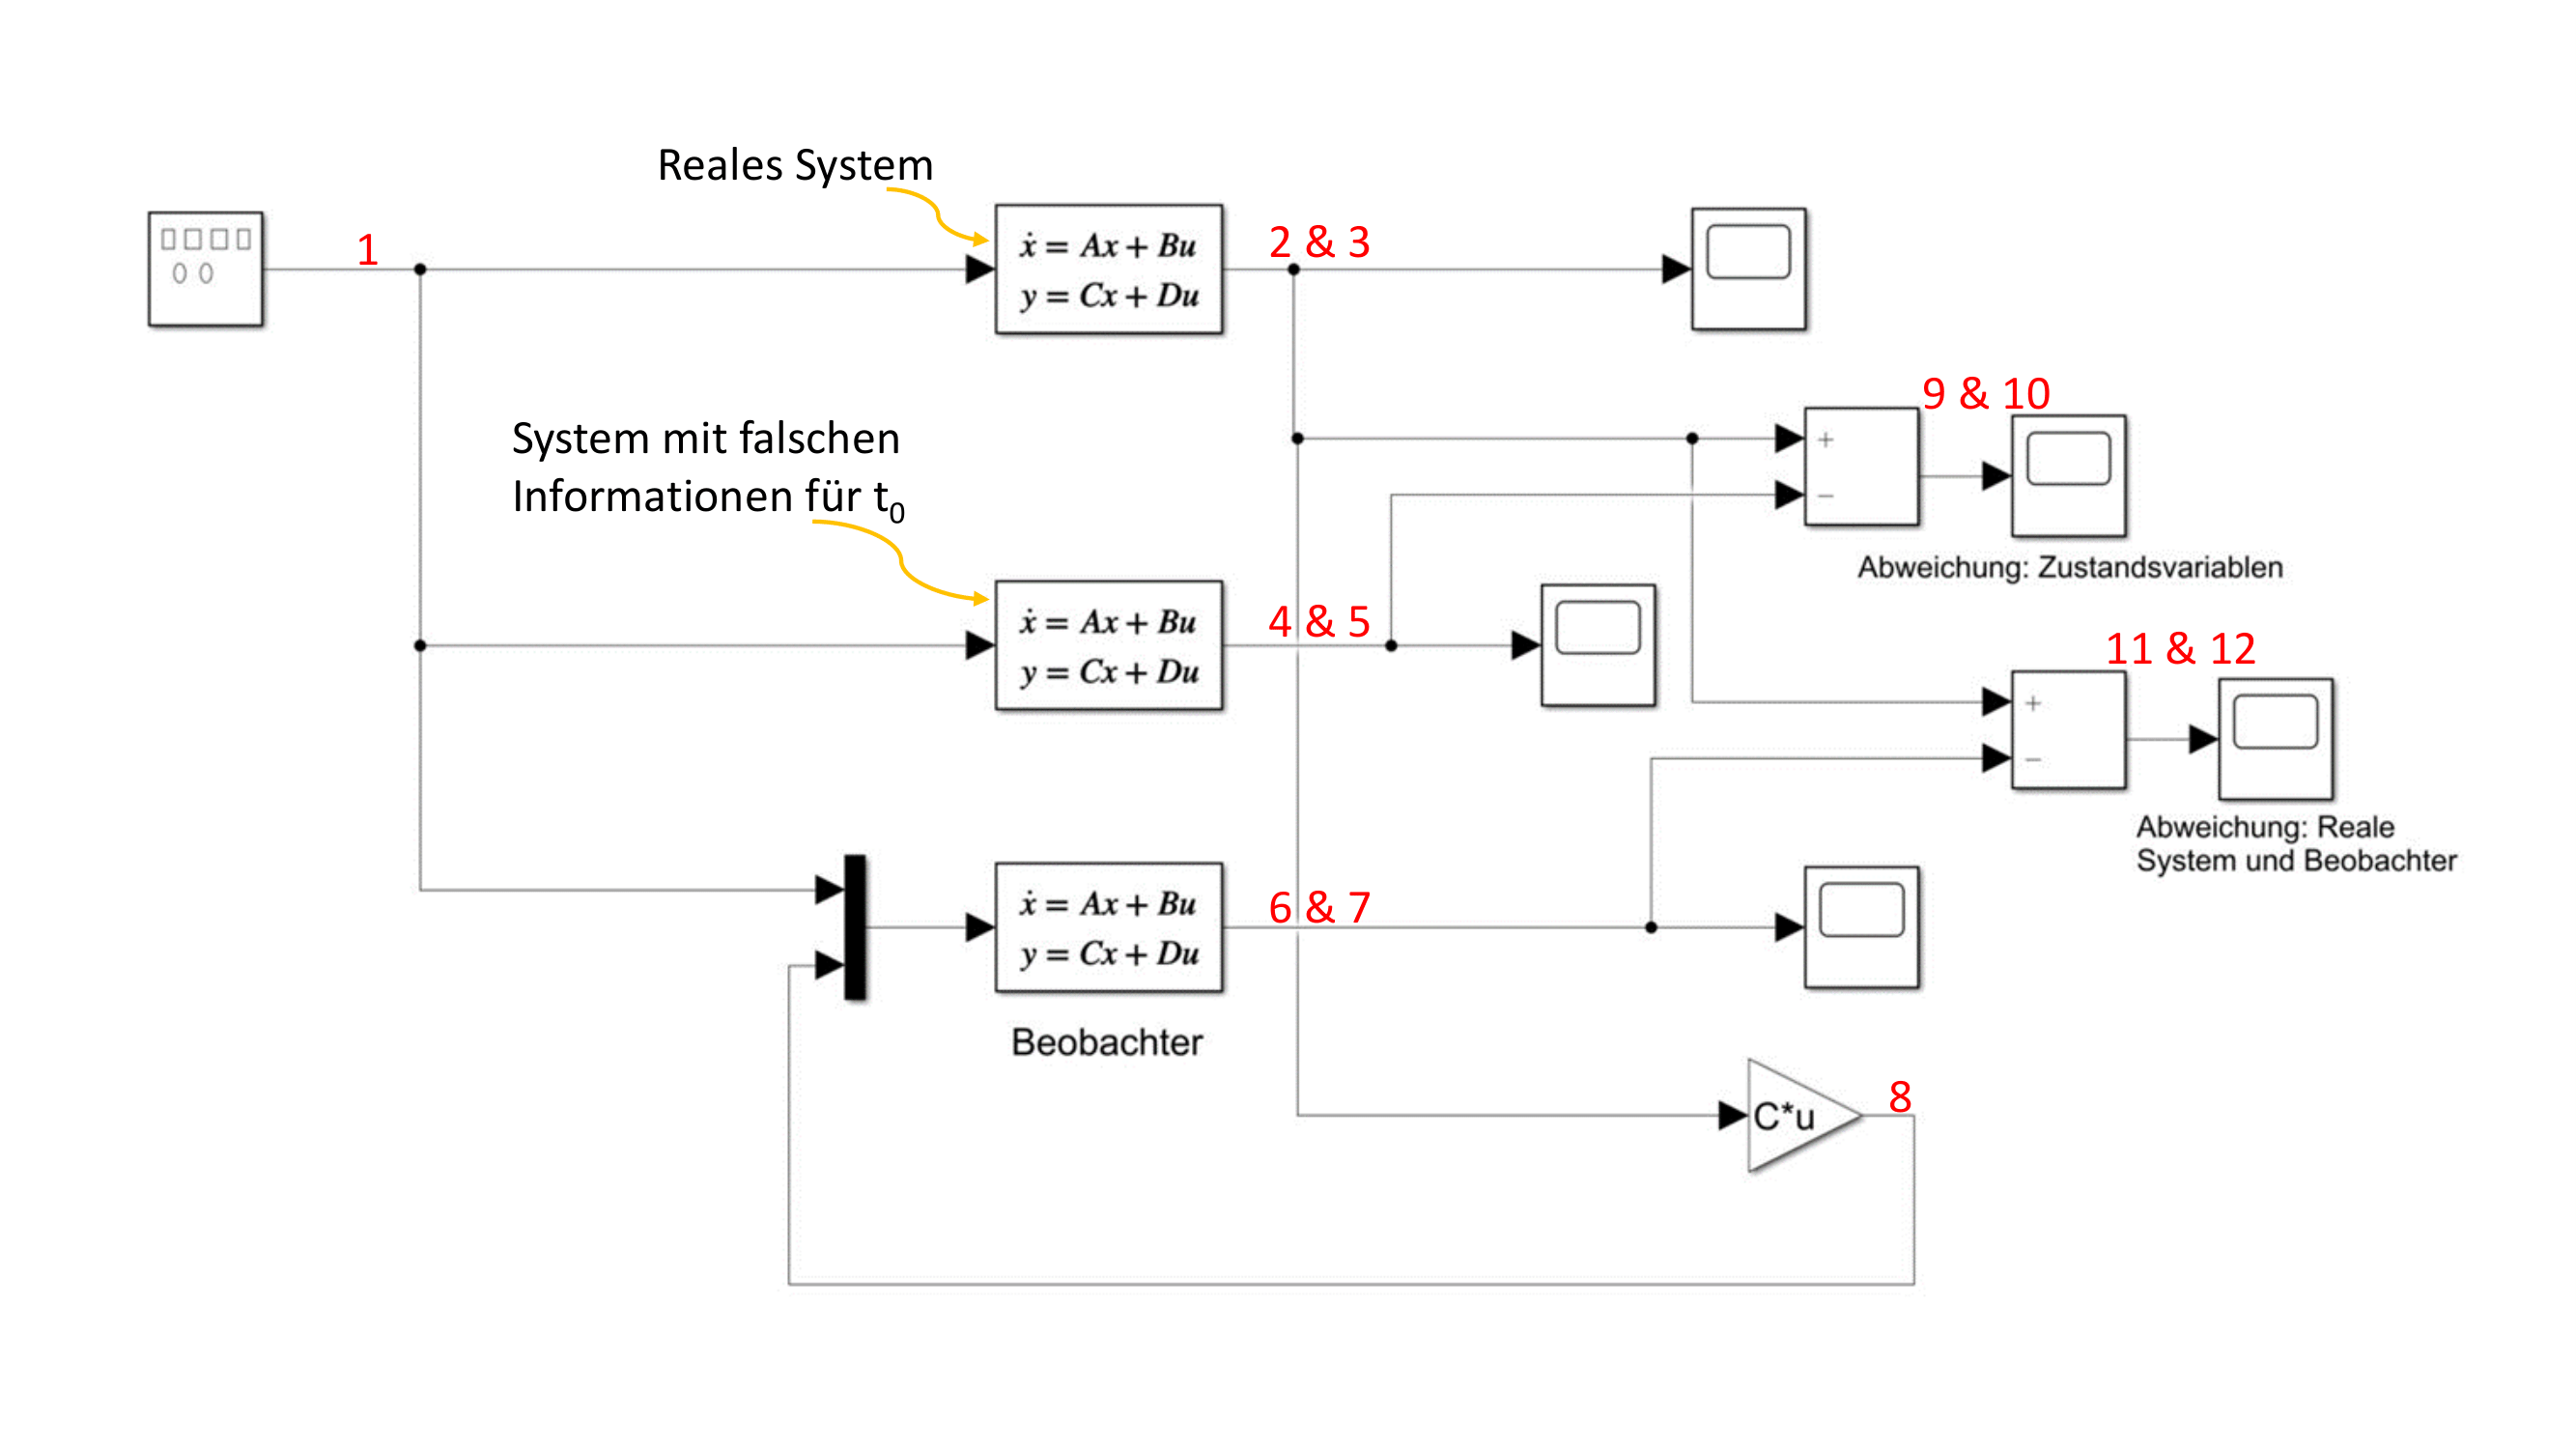

In [ ]:
% Simulink model A
% Set the Octave Engine to run the simulation
% Simulation Parameters
addpath("./Octsim");
% Start time
tini = 0;
% End time
tfinal = 10;
% Time Step
dt = 0.001;
% Number of data flows in the schematic
nflows_1 = 12;
% Initial conditions
xo_1 = [2; 1];
xo_2 = [0; 0];

% Matrices
C2 = eye(2);
D2 = [0;0];
Do = zeros(2,2);

% Instance of the simulation schematic
sc1 = Schema(tini,tfinal,dt,nflows_1);

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<br><span style='color:Orange'>SquareSignal Function Definition:</span>
<br><code>SquareSignal(1.argument = output, 2.argument = high, 3.argument = low, 4.argument = frequency , 5.argument = duty cycle )</code>
<br>Der Tastgrad (eng. Duty Cycle) wird als Verhältniszahl mit einem Wertebereich von 0 bis 1 oder 0 bis 100 % angegeben. Hier 50 (default).

In [ ]:
c1{1} = SquareSignal(1,10,0,1,0.5); %input

In [ ]:
c1{2} = StateSpace(1,[2 3],A,B,C2,D2,xo_1); % original system

c1{3} = StateSpace(1,[4 5],A,B,C2,D2,xo_2); % erroneous system
c1{4} = StateSpace([1 8],[6 7],Ao,Bo,C2,Do,xo_2); % observer system

c1{5} = Gain([2 3],8,C);

c1{6} = Sum(2,4,9,1,-1);
c1{7} = Sum(3,5,10,1,-1);
c1{8} = Sum(2,6,11,1,-1);
c1{9} = Sum(3,7,12,1,-1);
sc1.AddListComponents(c1);

% Run the schematic and plot
out1 = sc1.Run([1:12]);
time1 = out1(1,:);

In [ ]:
plot(time1,out1(3,:), time1,out1(4,:));
legend('State-Space 1, x_{dot}','State-Space 1, y')

In [ ]:
plot(time1,out1(10,:),'r',time1,out1(11,:),'b');
legend('Reale System','System mit falsche Bedingungen vor t0')
grid on

In [ ]:
plot(time1,out1(12,:),'r',time1,out1(13,:),'b');
legend('Offene Kreis','System mit Beobachter')
grid on

## <span style='color:Gray'>Beispiel #2 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Für das System der Zustandsraumdarstellung:
<br>$\dot{x}(t)$= $Ax(t)$ + $bu(t)$
<br>$y(t)$=$c^Tx(t)$
<br>Mit Matrizen:
 <br>    $A$ = $\left[ \begin{array}{rrrr}
           1 & 1  \\
          -2 & -1  \\
          \end{array}\right] $
<br><br>    $B$ =  $\left[ \begin{array}{rrrr}
           0   \\
           1   \\
          \end{array}\right] $
<br><br>    $C$ =  $\left[ \begin{array}{rrrr}
           1 & 0  \\
           \end{array}\right] $
<br><br>    $D$ = $0$ 
<br>vergleichen wir das dynamische Verhalten
vom geschlossenen Regelkreis ohne und mit
Beobachter.

In [ ]:
A = [-2 1;
      0 -1];
  
B = [0; 1];

C = [1 0];

D = 0;

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Zunächst prüfen wir die Steuerbarkeit:

In [ ]:
Sc = [B A*B]
rank(Sc)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Dann wird die Beobachtbarkeit geprüft:

In [ ]:
So = [C; C*A]
rank(So)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gebe nun für den geschlossenen Regelkreis diese zwei Pole vor:

In [ ]:
pc = [-5+1j*5 -5-1j*5]
K = place(A,B,pc)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Der Beobachterpol beträgt:

In [ ]:
csi = 0.8;

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wähle die Grundfrequenz zu $\omega_0$ = 10:

In [ ]:
omega0 =10;

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Definition von Beobachterpolen in Bezug auf die Grundfrequenz $\omega_0$ um das dynamische
Verhalten zu ändern:

In [ ]:
poles = [-csi*omega0+1j*omega0*sqrt(1-csi*csi) -csi*omega0-1j*omega0*sqrt(1-csi*csi)]
G = place(A',C',poles)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Berechne die Beobachter Eigenwerte:

In [ ]:
Ao = A-G'*C
eigs(Ao)

In [ ]:
Bo = [B G']

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wir arbeiten nun mit folgendem Simulink Modell:

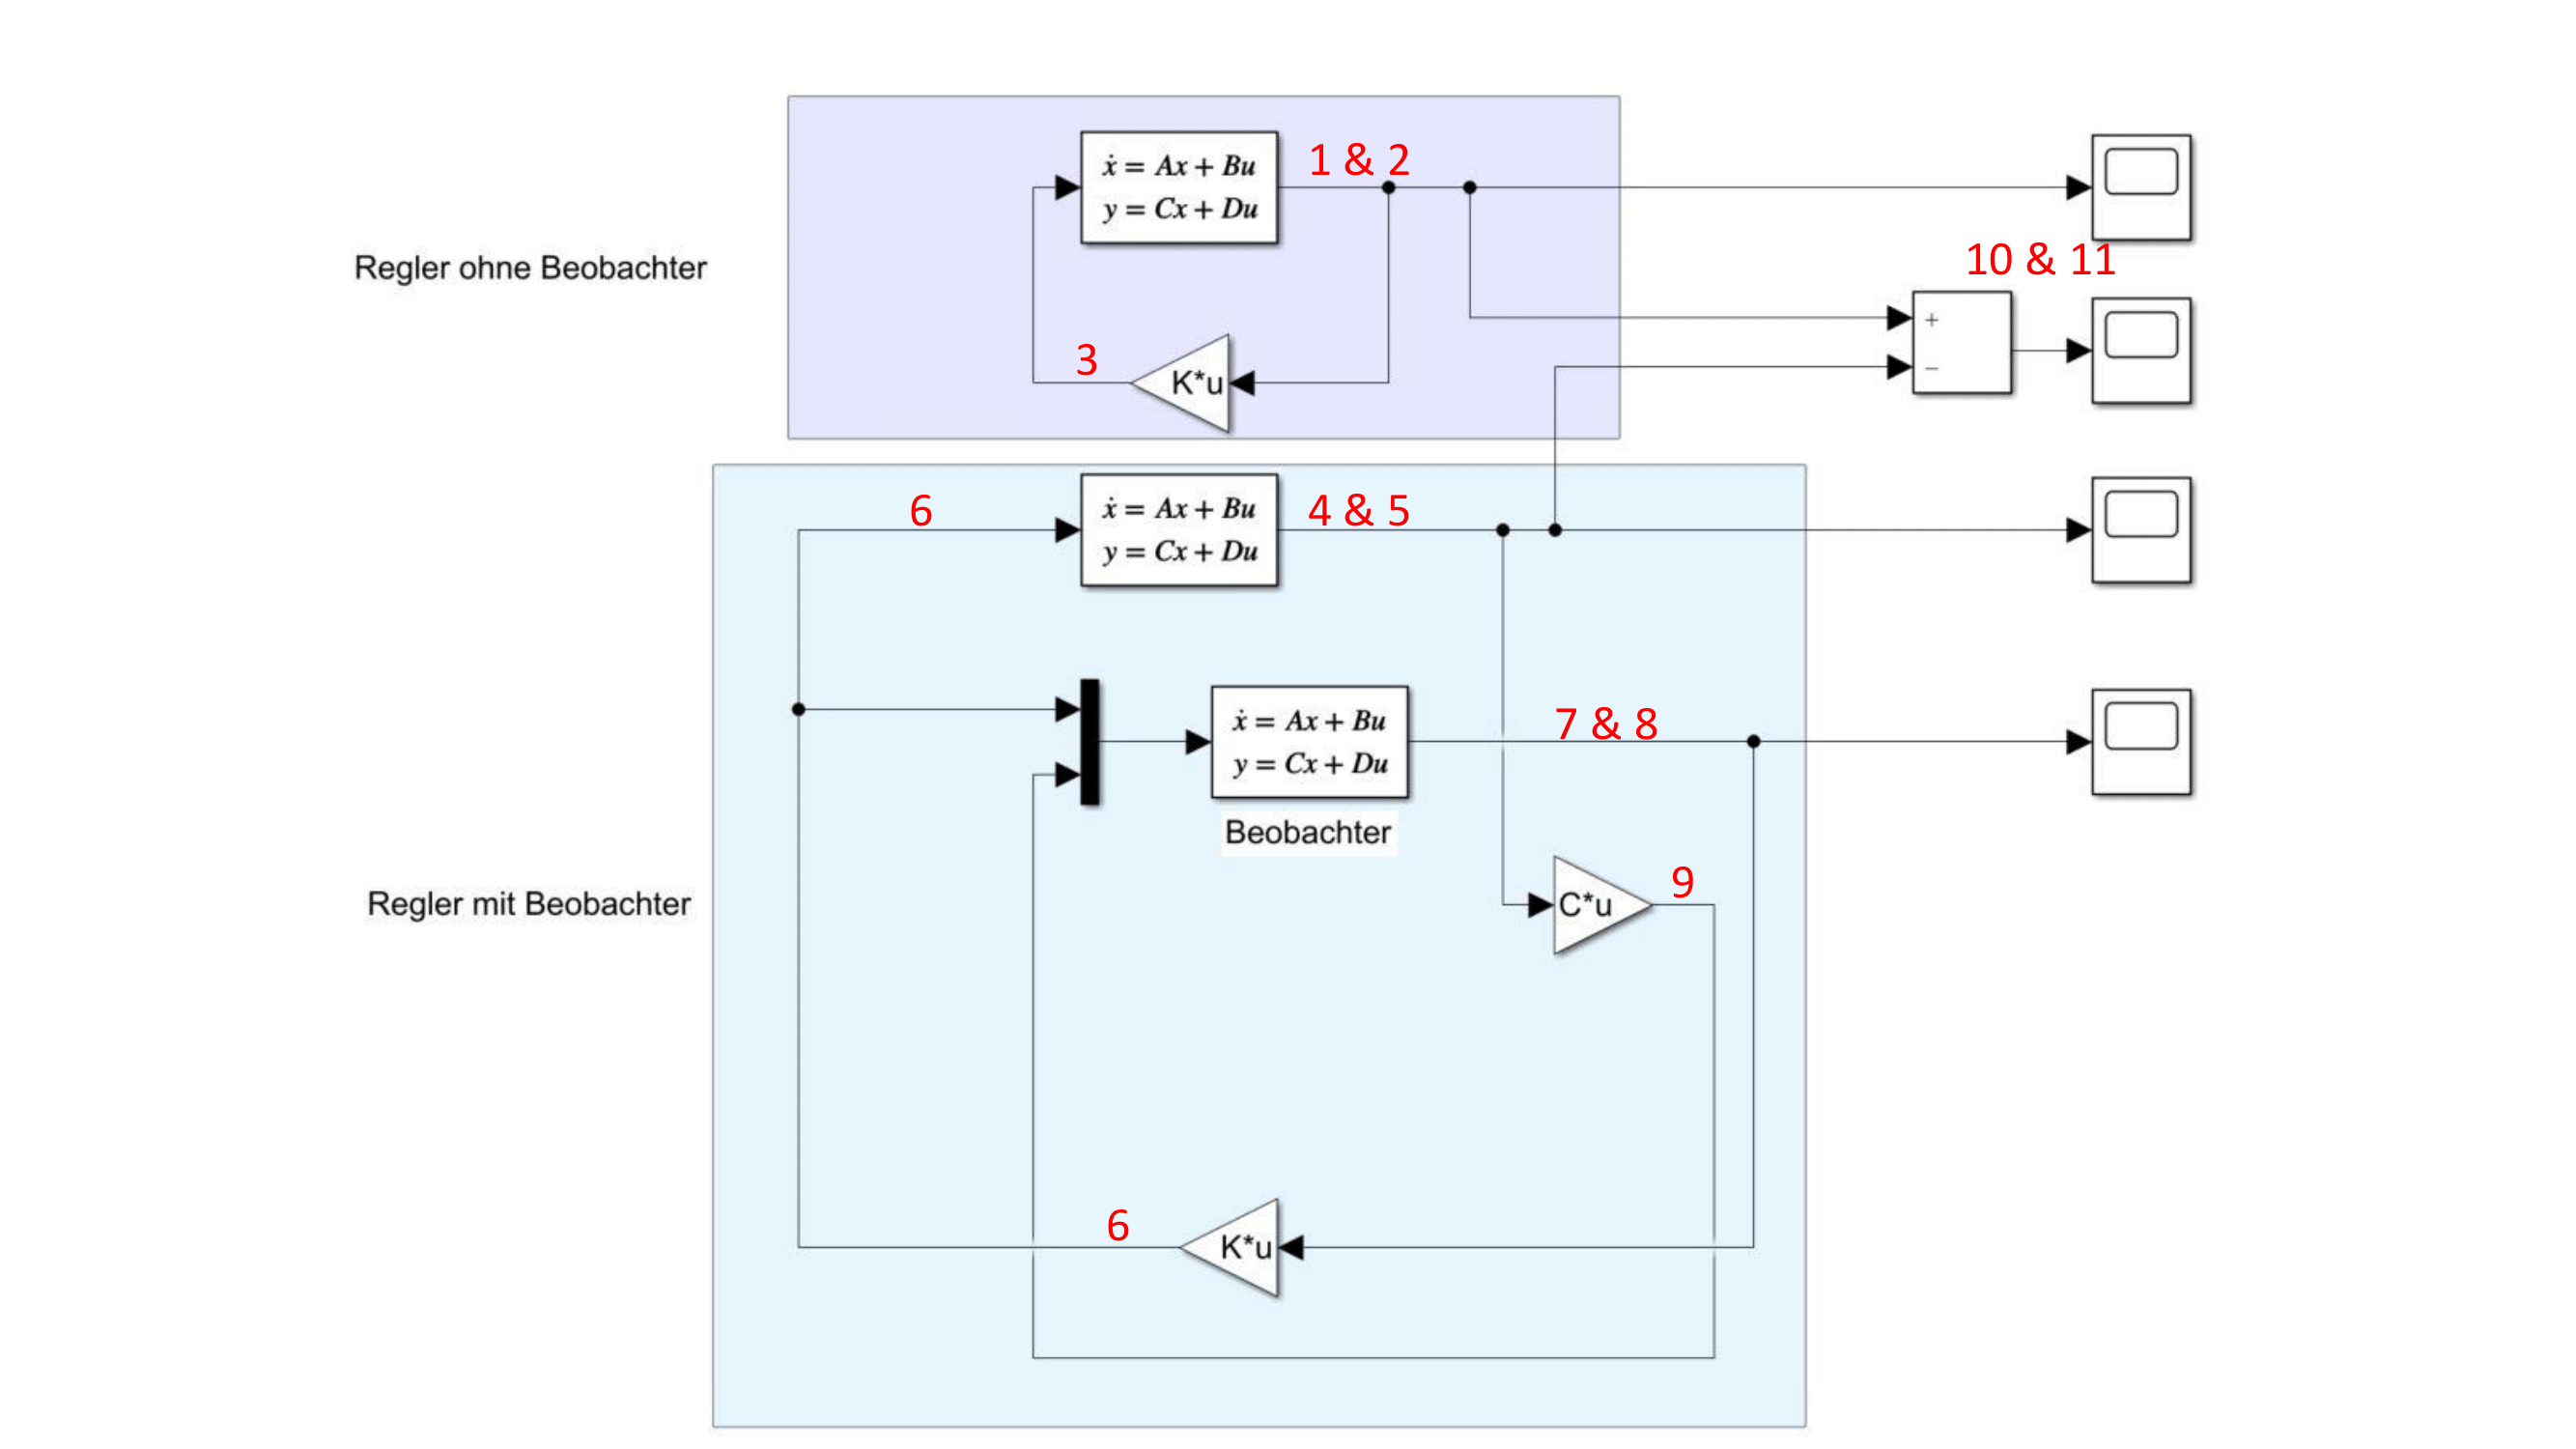

In [ ]:
% Simulink model A
% Set the Octave Engine to run the simulation
% Simulation Parameters
addpath("./Octsim");
% Start time
tini = 0;
% End time
tfinal = 5;
% Time Step
dt = 0.01;
% Number of data flows in the schematic
nflows_2 = 11;
% Initial conditions
xo_1 = [2; 1];
xo_2 = [0; 0];

% Matrices
C2 = eye(2);
D2 = [0;0];
Do = zeros(2,2);

% Instance of the simulation schematic
sc2 = Schema(tini,tfinal,dt,nflows_2);

c2{1} = StateSpace(3,[1 2],A,B,C2,D2,xo_1);
c2{2} = Gain([1 2],3,-K);

c2{3} = StateSpace(6,[4 5],A,B,C2,D2,xo_1);
c2{4} = Gain([7 8],6,-K);

c2{5} = StateSpace([6 9],[7 8],Ao,Bo,C2,Do,xo_2);
c2{6} = Gain([4 5],9,C);

c2{7} = Sum(1,4,10,1,-1);
c2{8} = Sum(2,5,11,1,-1);

sc2.AddListComponents(c2);

% Run the schematic and plot
out2 = sc2.Run([1:11]);
time2 = out2(1,:);

In [ ]:
plot(time2,out2(2,:),'r',time2,out2(3,:),'b');
legend('State-Space:1','State-Space:2')
grid on

In [ ]:
plot(time2,out2(8,:),'r',time2,out2(9,:),'b');
legend('State-Space 2:1','State-Space 2:2')
grid on

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<b> Aufgabe </b>: Wiederholen Sie nun die Simulation mit $\omega_0$ = 1, d.h. langsamer!

In [ ]:
% Update values with new omega
omega1 =1;
poles = [-csi*omega1+1j*omega1*sqrt(1-csi*csi) -csi*omega1-1j*omega1*sqrt(1-csi*csi)];
G = place(A',C',poles);
Ao = A-G'*C;
eigs(Ao);
Bo = [B G'];

% Start time
tini = 0;
% End time
tfinal = 5;
% Time Step
dt = 0.001;
% Number of data flows in the schematic
nflows_2 = 11;
% Initial conditions
xo_1 = [2; 1];
xo_2 = [0; 0];

% Matrices
C2 = eye(2);
D2 = [0;0];
Do = zeros(2,2);

% Instance of the simulation schematic
sc2 = Schema(tini,tfinal,dt,nflows_2);

c2{1} = StateSpace(3,[1 2],A,B,C2,D2,xo_1);
c2{2} = Gain([1 2],3,-K);

c2{3} = StateSpace(6,[4 5],A,B,C2,D2,xo_1);
c2{4} = Gain([7 8],6,-K);

c2{5} = StateSpace([6 9],[7 8],Ao,Bo,C2,Do,xo_2);
c2{6} = Gain([4 5],9,C);

c2{7} = Sum(1,4,10,1,-1);
c2{8} = Sum(2,5,11,1,-1);

sc2.AddListComponents(c2);

% Run the schematic and plot, now having omega:=1
out2 = sc2.Run([1:11]);
time2 = out2(1,:);
plot(time2,out2(8,:),'r',time2,out2(9,:),'b');
legend('State-Space 2:1','State-Space 2:2')
grid on

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Differenz der Systeme:

In [ ]:
plot(time2,out2(11,:),'r',time2,out2(12,:),'b');

## <span style='color:Gray'>Beispiel #3 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Nun arbeiten wir mit einem diskreten System. Für das System mit der Zustandsraumdarstellung:

In [ ]:
A = [-2 1;
      0 -1];
  
B = [0; 1];

C = [1 0];

D = 0;

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
und der Abtastzeit $T_s=0.1$ wollen wir das dynamische Verhalten vom geschlossenen Regelkreis ohne und mit Beobachter vergleichen.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Zunächst prüfen wir die Steuerbarkeit:

In [ ]:
Sc = [B A*B]
rank(Sc)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das System ist zeitdiskret. Infolgedessen führe folgenden Berechnungen durch:

In [ ]:
Ts = 0.01;

pc = [-5+1j*5 -5-1j*5];
pcd = exp(pc.*Ts);
Ad = expm(A*Ts)
Bd = (Ad-eye(2))*inv(A)*B

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Reglerentwurf:

In [ ]:
K = place(Ad,Bd,pcd) 

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die Beobachtbarkeit wird geprüft:

In [ ]:
So = [C; C*Ad]
rank(So)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Beobachter Eigenwerte:

In [ ]:
poles = [0 0];

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Es handelt sich um einen <span style='color:OrangeRed'>Deadbeat Beobachter</span>!

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Beobachterpole:
<br><span style='color:Gray'>Hinweis</span>: Verwende Funktion <code>acker</code> anstelle von <code>place</code>!

In [ ]:
Gd = acker(Ad',C',poles) 

Aod = Ad-Gd'*C
eigs(Aod)
Bod = [Bd Gd'];

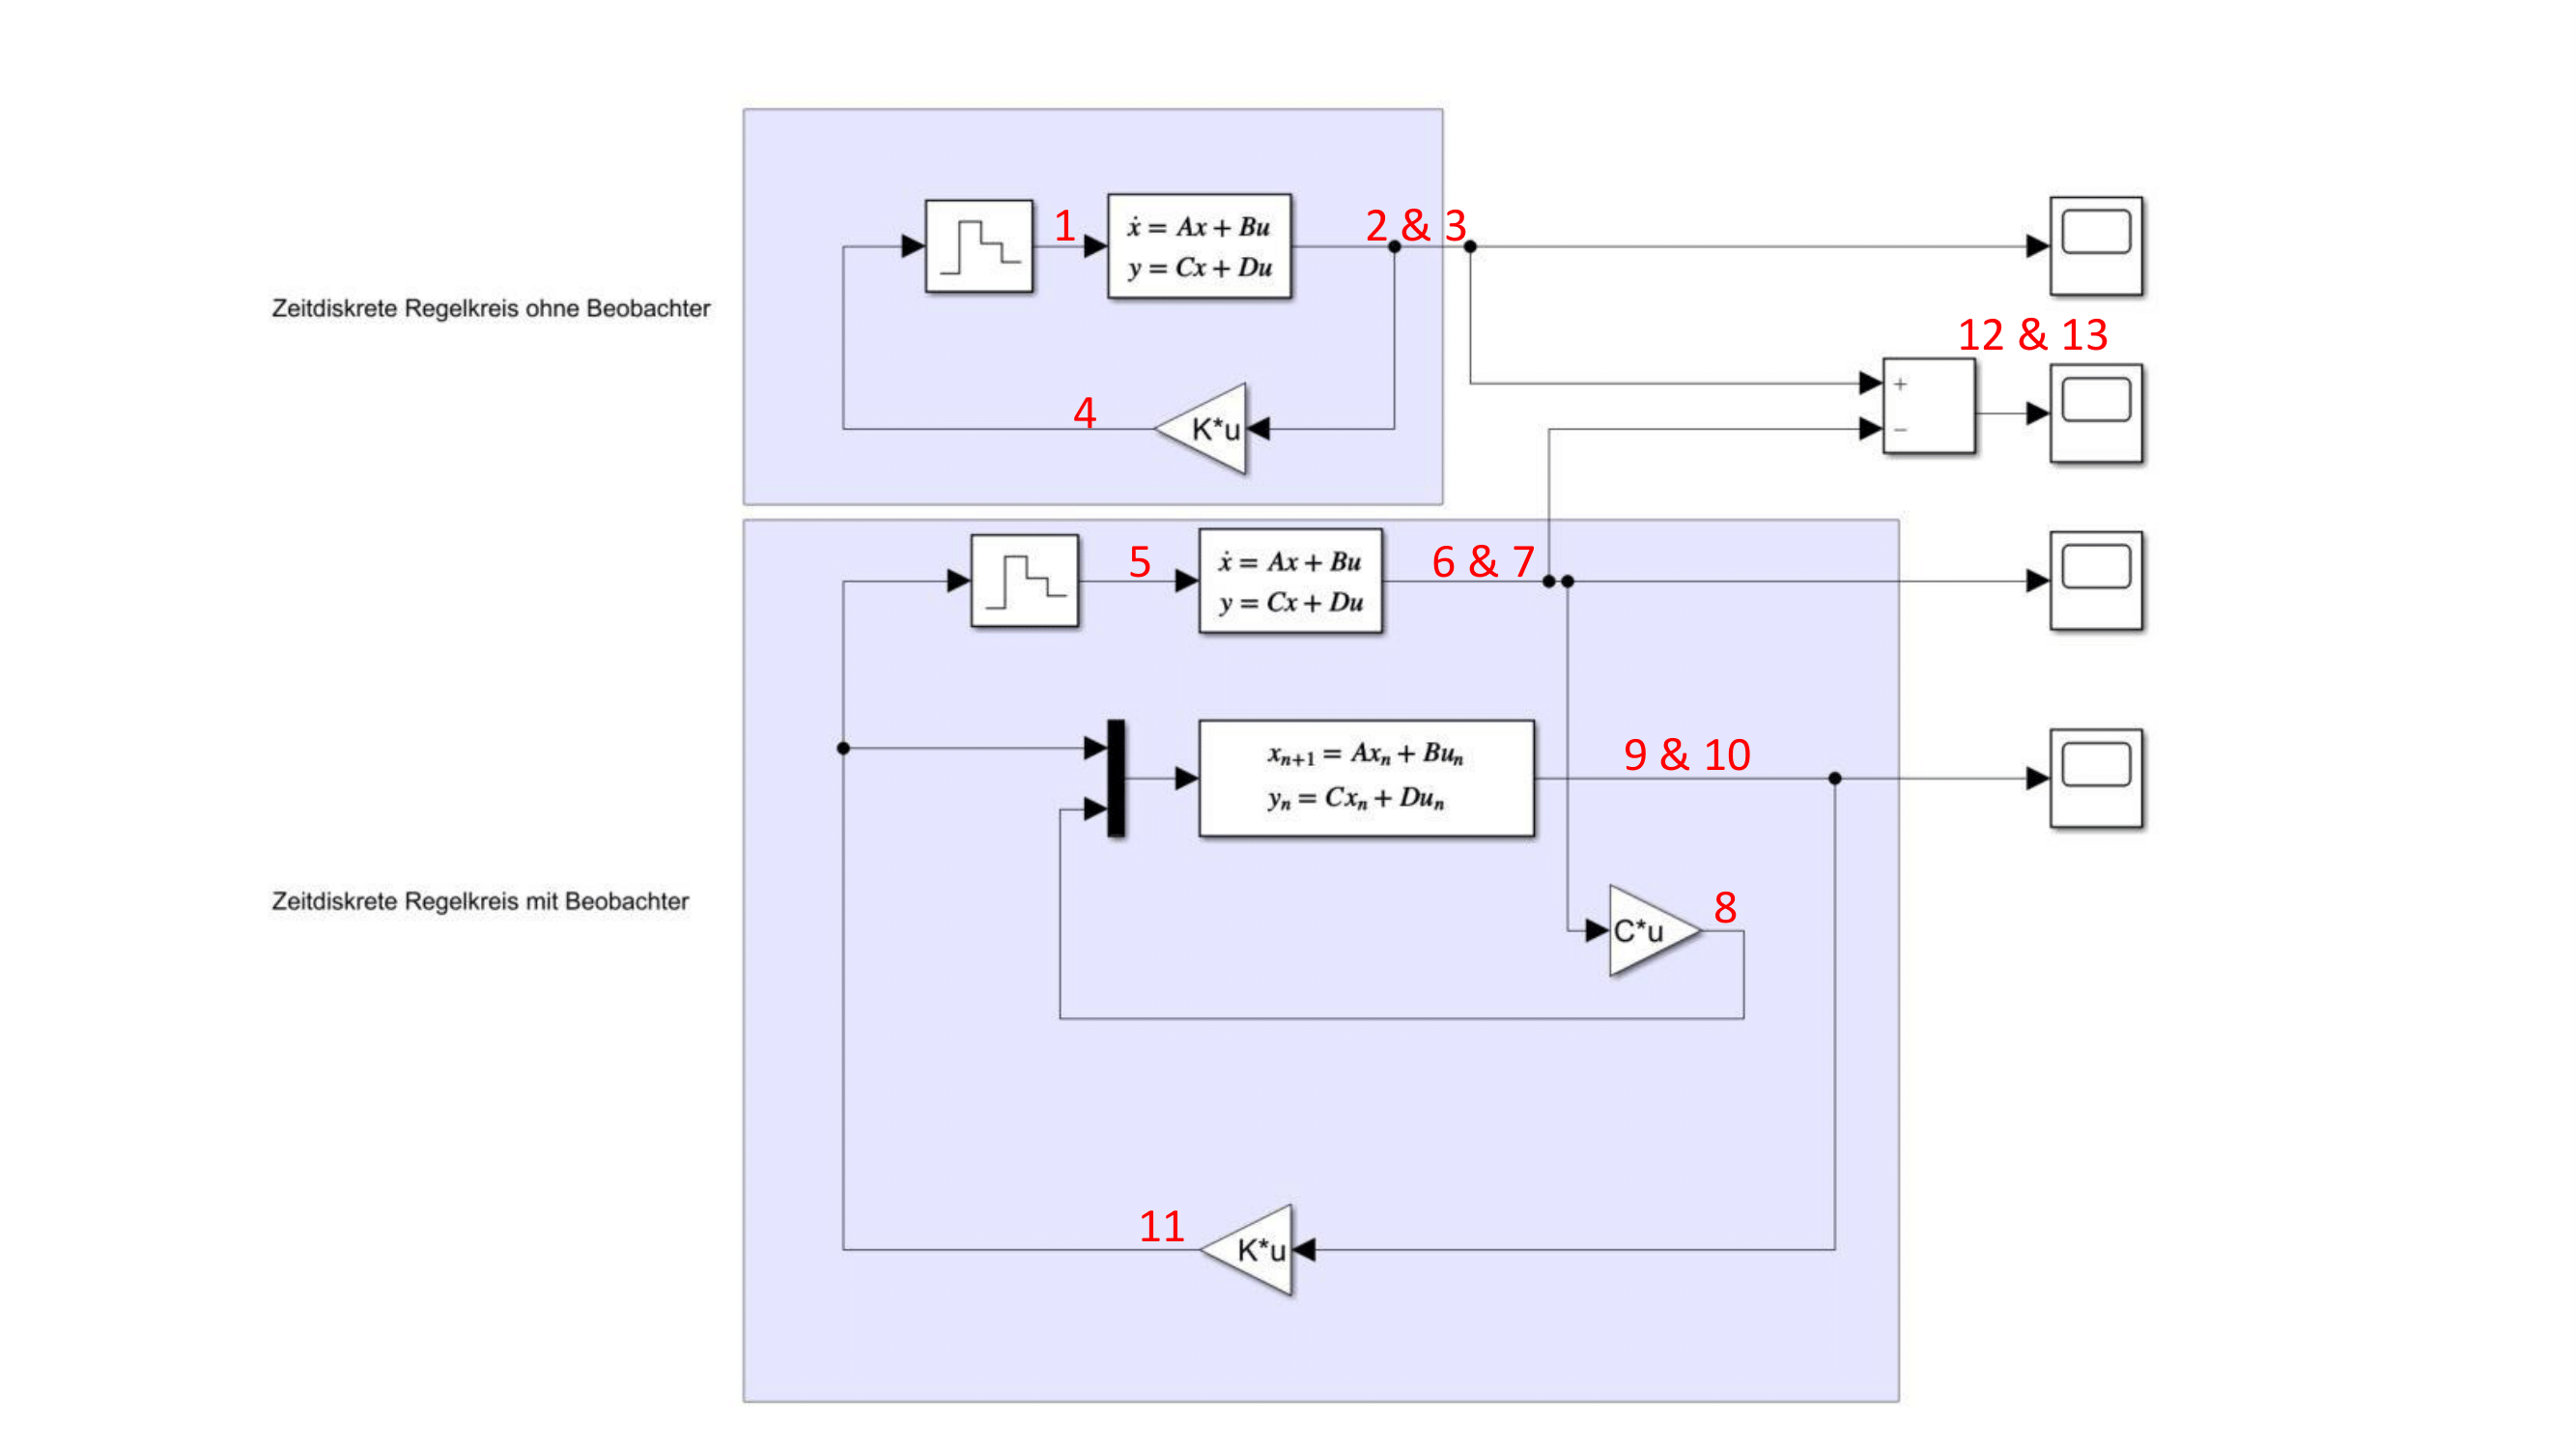

In [ ]:
% Simulink model A
% Number of data flows in the schematic
% Start time
tini = 0;
% End time
tfinal = 3;
% Time Step
dt = 0.001;
% Number of data flows in the schematic
nflows_3 = 13;
% Initial conditions
xo_1 = [2; 1];
xo_2 = [0; 0];

% Matrices
C2 = eye(2);
D2 = [0;0];
Do = zeros(2,2);

% Instance of the simulation schematic
sc3 = Schema(tini,tfinal,dt,nflows_3);

c3{1} = ZOH(4,1,Ts); %ZOH arguments: in_ID,out_ID,T
c3{2} = StateSpace(1,[2 3],A,B,C2,D2,xo_1); 
c3{3} = Gain([2 3],4,-K);

c3{4} = ZOH(11,5,Ts);
c3{5} = StateSpace(5,[6 7],A,B,C2,D2,xo_1);

c3{6} = Sum(2,6,12,1,-1);
c3{7} = Sum(3,7,13,1,-1);

c3{8} = Gain([6 7],8,C);

% Notice, that we introduce the discrete StateSpace Object here: DTStateSpace(in,out,A,B,C,D,T,xo)
c3{9} = DTStateSpace([11 8],[9 10],Aod,Bod,C2,Do,Ts,xo_2);

c3{10} = Gain([9 10],11,-K);

sc3.AddListComponents(c3);

% Run the schematic and plot
out3 = sc3.Run([1:13]);
time3 = out3(1,:);

**Plot zeitdiskreten Regelkreis ohne Beobachter:**

In [ ]:
plot(time3,out3(3,:),'r',time3,out3(4,:),'b');
legend('State-Space:1','State-Space:2')
grid on

**Plot Regelkreis mit Zustandsbeobachter:**

In [ ]:
plot(time3,out3(7,:),'r',time3,out3(8,:),'b');
legend('State-Space 1:1','State-Space 1:2')
grid on

**Plot Differenz beider Regelkreise:**

In [ ]:
plot(time3,out3(13,:),'r',time3,out3(14,:),'b');
legend('Discrete State-Space:1','Discrete State-Space:2')
grid on

In [ ]:
plot(time3,out3(10,:),'r',time3,out3(11,:),'b');
legend('Discrete State-Space:1','Discrete State-Space:2')
grid on